<img src="../images/featureEng.png">

## basic idea of feature scaling is to bring all data in same range 


there are two methods of doing feature scaling 1st is Standardisation and other is normalisation in this notebook i am do standadisation

this is also known as z-score Normalisation <br>
new_value=(old_value-mean)/standard_deviation <br>
mean of new data is 0 and its std_deviation is 1 <br>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df=pd.read_csv("../Datasets/Social_Network_Ads.csv")
df=df.iloc[:,:2]
df.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test=train_test_split(df,test_size=0.25)

X_train.shape,X_test.shape

((300, 2), (100, 2))

In [18]:
from sklearn.preprocessing import StandardScaler

# it standardise by the formula given above
scaler=StandardScaler()

# by this command model learn the parameters 
# we only calculate parameters for x_train and then apply it to both train and test data
scaler.fit(X_train)

X_train_Scaled=scaler.transform(X_train)
X_test_Scaled=scaler.transform(X_test)

X_train_Scaled=pd.DataFrame(X_train_Scaled,columns=X_train.columns)
X_test_Scaled=pd.DataFrame(X_test_Scaled,columns=X_test.columns)

In [21]:
np.round(X_test_Scaled.describe())

,Age,EstimatedSalary
count,100.0,100.0
mean,-0.0,-0.0
std,1.0,1.0
min,-2.0,-2.0
25%,-1.0,-1.0
50%,-0.0,-0.0
75%,1.0,0.0
max,2.0,2.0


In [22]:
np.round(X_train_Scaled.describe())

,Age,EstimatedSalary
count,300.0,300.0
mean,-0.0,0.0
std,1.0,1.0
min,-2.0,-2.0
25%,-1.0,-1.0
50%,-0.0,-0.0
75%,1.0,0.0
max,2.0,2.0


<Axes: title={'center': 'After Scaling'}, xlabel='Age', ylabel='EstimatedSalary'>

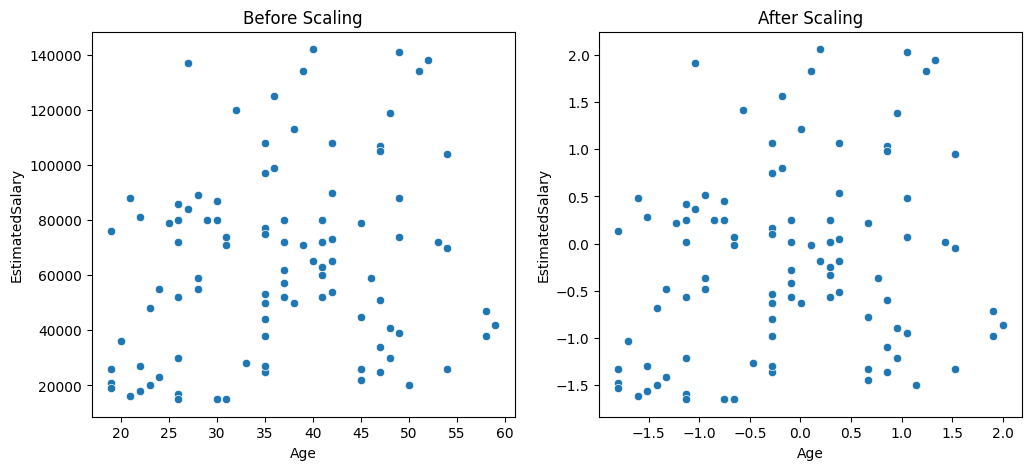

In [35]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title("Before Scaling")
sns.scatterplot(x=X_test["Age"],y=X_test["EstimatedSalary"],ax=ax1)

ax2.set_title("After Scaling")
sns.scatterplot(x=X_test_Scaled["Age"],y=X_test_Scaled["EstimatedSalary"],ax=ax2)

<Axes: title={'center': 'After Scaling'}, xlabel='Age', ylabel='Density'>

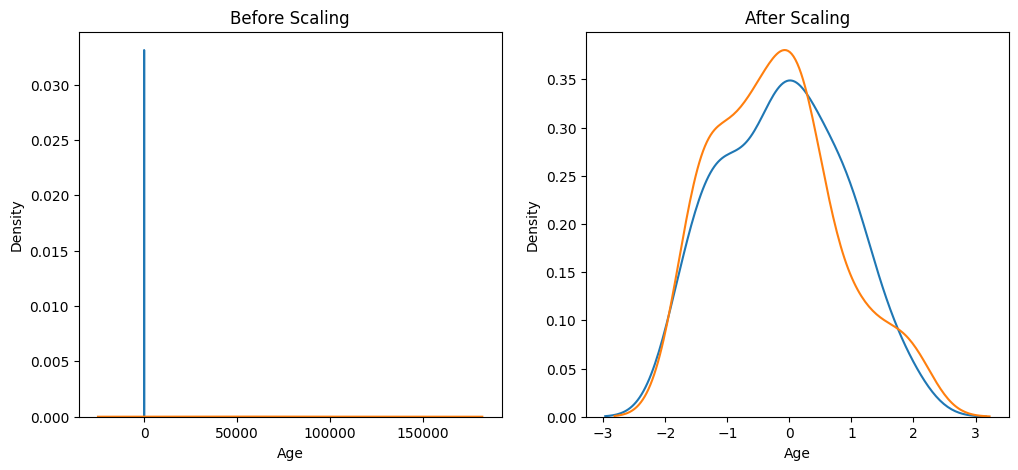

In [40]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title("Before Scaling")
sns.kdeplot(X_test["Age"],ax=ax1)
sns.kdeplot(X_test["EstimatedSalary"],ax=ax1)

ax2.set_title("After Scaling")
sns.kdeplot(X_test_Scaled["Age"],ax=ax2)
sns.kdeplot(X_test_Scaled["EstimatedSalary"],ax=ax2)

# there is no effect on outliers by standadisation